# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_titanic_train = pd.read_csv("titanic_train.csv")
original_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 01 数据评估和清洗

In [3]:
cleaned_titanic_train = original_titanic_train.copy()
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 数据类型转换
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype("str")
cleaned_titanic_train['Sex'] = cleaned_titanic_train['Sex'].astype("category")
cleaned_titanic_train['Survived'] = cleaned_titanic_train['Survived'].astype("category")
cleaned_titanic_train['Pclass'] = cleaned_titanic_train['Pclass'].astype("category")
cleaned_titanic_train['Embarked'] = cleaned_titanic_train['Embarked'].astype("category")

cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


In [5]:
# 用年龄平均值填充缺失的乘客年龄
cleaned_titanic_train["Age"].fillna(cleaned_titanic_train['Age'].mean(), inplace = True)
cleaned_titanic_train['Age'].isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23896\371148272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_titanic_train["Age"].fillna(cleaned_titanic_train['Age'].mean(), inplace = True)


np.int64(0)

In [6]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


认为登船港口和船舱号不是关键因素，先保留。

In [8]:
cleaned_titanic_train['PassengerId'].duplicated().sum()

np.int64(0)

In [9]:
cleaned_titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
cleaned_titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
cleaned_titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
cleaned_titanic_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

无不一致数据。

In [13]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## 02 数据整理

In [14]:
# 计算家庭成员总数
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']
cleaned_titanic_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


## 03 可视化

In [22]:
sns.set_palette("muted")

In [16]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams['figure.autolayout'] = True

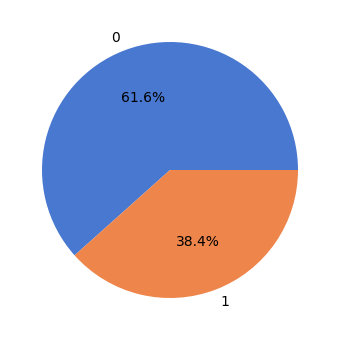

In [23]:
# 幸存比例
survive_count = cleaned_titanic_train['Survived'].value_counts()
survive_label = survive_count.index
plt.pie(survive_count, labels = survive_label, autopct='%.1f%%')
plt.show()

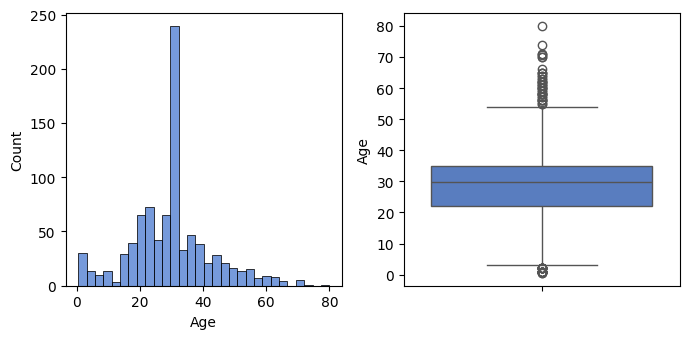

In [24]:
# 年龄分布
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_titanic_train, x='Age', ax=axes[0])
sns.boxplot(cleaned_titanic_train, y='Age', ax=axes[1])
plt.show()

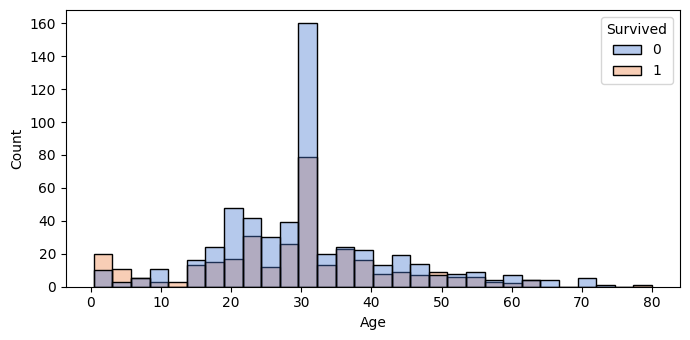

In [25]:
# 年龄&幸存？
sns.histplot(cleaned_titanic_train, x='Age', hue='Survived', alpha=0.4)
plt.show()

婴儿幸存比例高，其余年龄段均遇难>幸存。

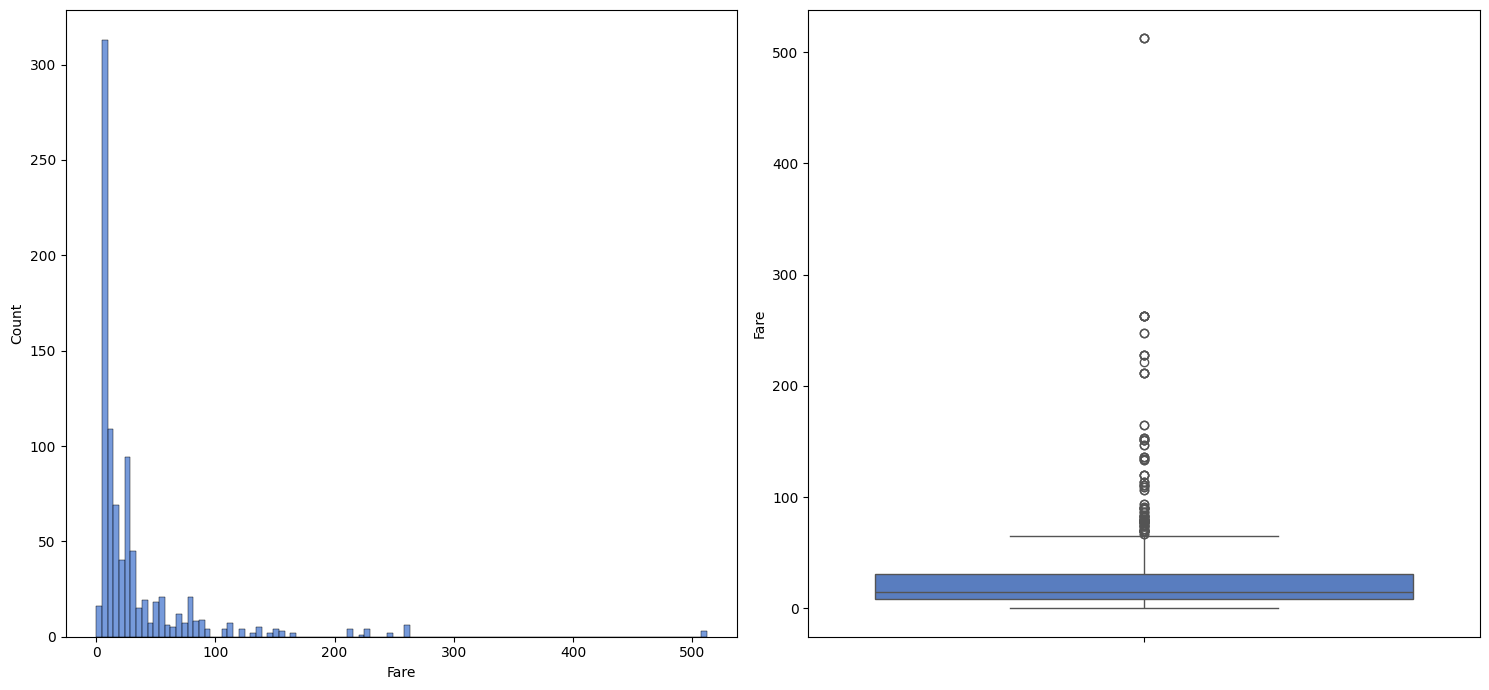

In [31]:
# 船票金额分布
figure, axes = plt.subplots(1,2, figsize=[15,7])
sns.histplot(cleaned_titanic_train, x='Fare', ax=axes[0])
sns.boxplot(cleaned_titanic_train, y='Fare', ax=axes[1])
plt.show()

右偏态分布，有极高值，拉高均值。

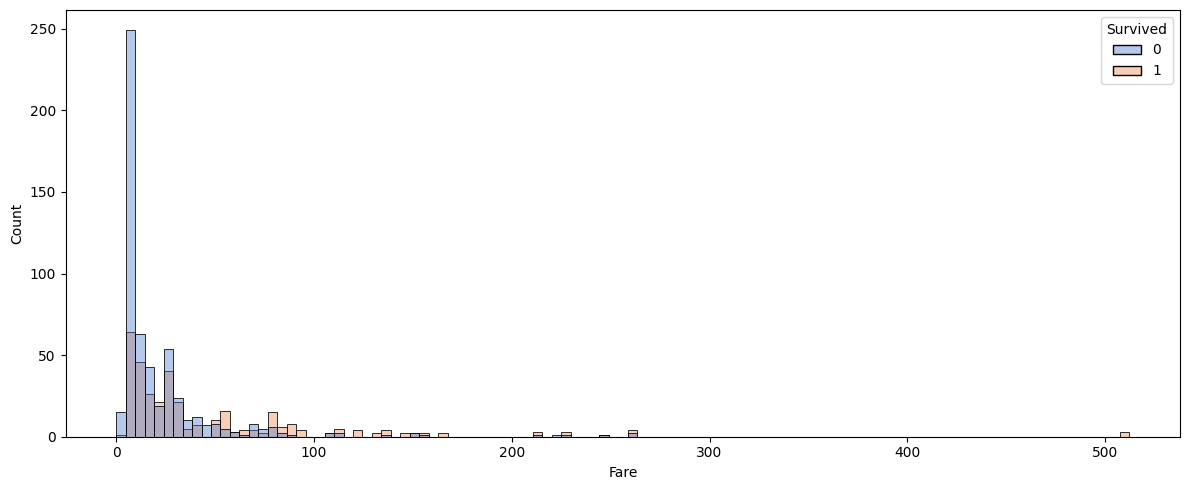

In [32]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(cleaned_titanic_train, x='Fare', hue='Survived', alpha=0.4)
plt.show()

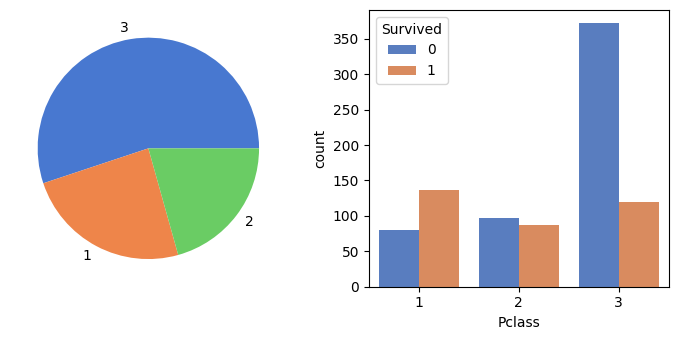

In [41]:
# 船舱等级&幸存？
figure, axes = plt.subplots(1, 2)
pclass_count = cleaned_titanic_train["Pclass"].value_counts()
pclass_value = pclass_count.index
axes[0].pie(pclass_count,
            labels=pclass_value)
sns.countplot(cleaned_titanic_train, x="Pclass", hue="Survived", ax=axes[1])
plt.show()

低等船舱乘客遇难比例更大。

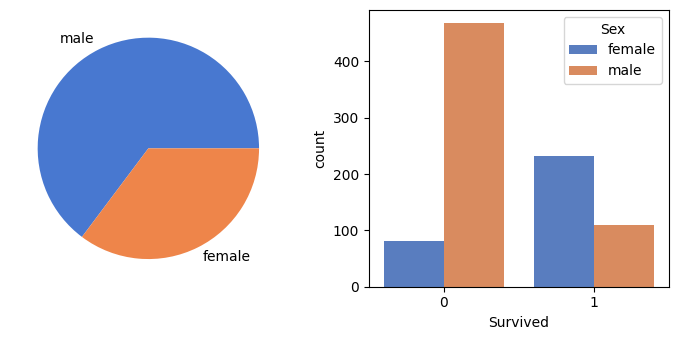

In [42]:
# 性别&幸存？
figure, axes = plt.subplots(1, 2)
sex_count = cleaned_titanic_train['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(cleaned_titanic_train, x='Survived', hue='Sex', ax=axes[1])
plt.show()

男性乘客中遇难比例更大，女性乘客中幸存比例更大。

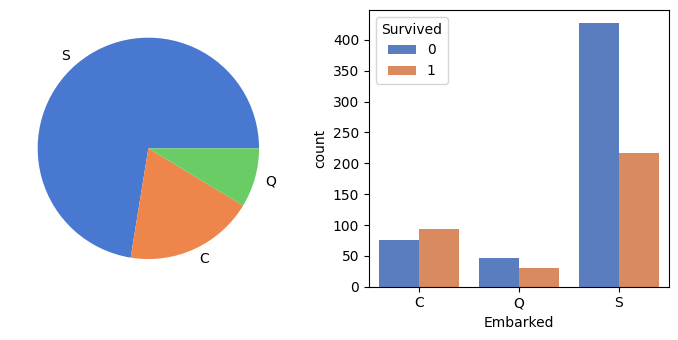

In [43]:
# 港口&幸存？
figure, axes = plt.subplots(1, 2)
embarked_count = cleaned_titanic_train['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(cleaned_titanic_train, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反。

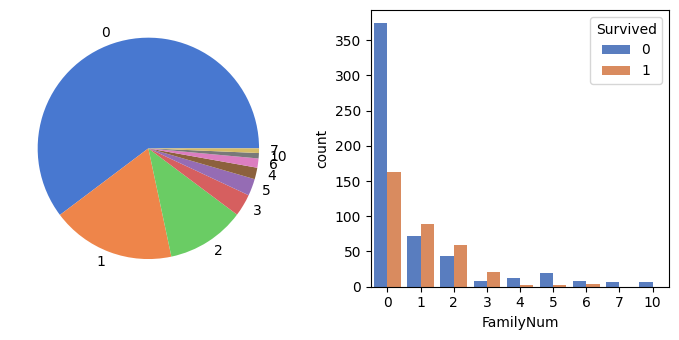

In [44]:
# 家庭成员数&幸存？
figure, axes = plt.subplots(1, 2)
familyNum_count = cleaned_titanic_train['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(cleaned_titanic_train, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

家庭成员在1～3位之间的幸存人数超过遇难人数。

## 04 逻辑回归

In [53]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [54]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyNum
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [55]:
# 引入虚拟变量
lr_titanic_train = pd.get_dummies(
    lr_titanic_train,
    drop_first=True,
    columns = ['Pclass', 'Sex', 'Embarked'],
    dtype=int
)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,1


In [56]:
# 因变量
y = lr_titanic_train['Survived']

# 自变量&相关性检验
X = lr_titanic_train.drop(['Survived'],axis=1)
X.corr()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153,-0.013855,-0.027121
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631,-0.026354,0.070941
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489,-0.081228,0.063036
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333,-0.117216,-0.166603
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988,-0.058592,0.079977
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746,-0.127301,0.192061
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143,0.237449,-0.009511
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000,-0.074115,0.125722
Embarked_Q,-0.013855,-0.026354,-0.081228,-0.117216,-0.058592,-0.127301,0.237449,-0.074115,1.000000,-0.496624
Embarked_S,-0.027121,0.070941,0.063036,-0.166603,0.079977,0.192061,-0.009511,0.125722,-0.496624,1.000000


In [62]:
X.corr().abs()>0.8

,const,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
const,False,False,False,False,False,False,False,False,False
Age,False,True,False,False,False,False,False,False,False
Fare,False,False,True,False,False,False,False,False,False
FamilyNum,False,False,False,True,False,False,False,False,False
Pclass_2,False,False,False,False,True,False,False,False,False
Pclass_3,False,False,False,False,False,True,False,False,False
Sex_male,False,False,False,False,False,False,True,False,False
Embarked_Q,False,False,False,False,False,False,False,True,False
Embarked_S,False,False,False,False,False,False,False,False,True


In [58]:
# 移除 SibSp 和 Parch
X = X.drop(['SibSp', 'Parch'], axis=1)

In [59]:
# 为线性方程添加截距
X = sm.add_constant(X)

In [63]:
X.corr().abs()>0.8

,const,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
const,False,False,False,False,False,False,False,False,False
Age,False,True,False,False,False,False,False,False,False
Fare,False,False,True,False,False,False,False,False,False
FamilyNum,False,False,False,True,False,False,False,False,False
Pclass_2,False,False,False,False,True,False,False,False,False
Pclass_3,False,False,False,False,False,True,False,False,False
Sex_male,False,False,False,False,False,False,True,False,False
Embarked_Q,False,False,False,False,False,False,False,True,False
Embarked_S,False,False,False,False,False,False,False,False,True


In [64]:
# 调用 logic 函数，利用最大似然优化得到回归模型参数值
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.440917
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.3379
Time:                        22:41:33   Log-Likelihood:                -392.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.179e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0970      0.476      8.606      0.000       3.164       5.030
Age           -0.0385      0.008     -4.903      0.000      -0.054      -0.023
Fare           0.0025      0.002      0.994      0.320      -0.002       0.007
FamilyNum     -0.2211      0.068     -3.230      0.001      -0.355      -0.087
Pclass_2      -0.9031      0.297     -3.043      0.002      -1.485      -0.321
Pclass_3      -2.1336      0.297     -7.178      0.000      -2.716      -1.551
Sex_male      -2.7335      0.200    -13.647      0.000      -3.126      -2.341
Embarked_Q    -0.0680      0.380     -0.179      0.858      -0.813       0.677
Embarked_S    -0.4684      0.239     -1.960      0.050      -0.937      -0.000
==============================================================================
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为Fare、Embarked_Q对乘客幸存概率没有显著性影响。因此可以把这个变量移除后，再次建立逻辑回归模型。

In [65]:
X = X.drop(['Fare', 'Embarked_Q'], axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.441555
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.3369
Time:                        22:44:14   Log-Likelihood:                -393.43
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.081e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2929      0.421     10.202      0.000       3.468       5.118
Age           -0.0391      0.008     -5.002      0.000      -0.054      -0.024
FamilyNum     -0.2004      0.065     -3.080      0.002      -0.328      -0.073
Pclass_2      -1.0378      0.267     -3.887      0.000      -1.561      -0.515
Pclass_3      -2.3085      0.244     -9.476      0.000      -2.786      -1.831
Sex_male      -2.7355      0.199    -13.769      0.000      -3.125      -2.346
Embarked_S    -0.4782      0.204     -2.345      0.019      -0.878      -0.078
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性、在S港口登陆。

In [66]:
# Age
np.exp(-0.0391)

np.float64(0.9616545388840454)

In [67]:
# FamilyNum
np.exp(-0.2004)

np.float64(0.8184033262664787)

In [68]:
# Pclass_2
np.exp(-1.0378)

np.float64(0.3542331382470292)

In [69]:
# Pclass_3
np.exp(-2.3085)

np.float64(0.09941025516174853)

In [70]:
# Sex
np.exp(-2.7355)

np.float64(0.06486156821071642)

In [71]:
# Embarked_S
np.exp(-0.4782)

np.float64(0.6198982049422148)

以上结果说明：

年龄每增加1岁，生还概率降低4%左右。

每多一名同乘家庭成员，生还概率降低20%左右。

二等舱乘客的生还概率比一等舱乘客低65%左右。

三等舱乘客的生还概率比一等舱乘客低91%左右。

男性乘客的生还概率比女性乘客低94%左右。

南安普敦下船乘客的生还概率低39%左右。

根据模型参数值，我们总结：

- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高；
- 不在南安普敦下船的乘客幸存率更高。

前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条和第五条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。

In [84]:
# 预测 test 文件里的乘客生还情况
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [86]:
cleaned_titanic_test = titanic_test.copy()
cleaned_titanic_test['Age'].fillna(cleaned_titanic_test['Age'].mean(), inplace=True)
cleaned_titanic_test['Age'].isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23896\2561652803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_titanic_test['Age'].fillna(cleaned_titanic_test['Age'].mean(), inplace=True)


np.int64(0)

In [87]:
cleaned_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
# 分类变量Category，并传入所有分类值
cleaned_titanic_test['Pclass'] = pd.Categorical(cleaned_titanic_test['Pclass'],categories=['1', '2', '3'])
cleaned_titanic_test['Sex'] = pd.Categorical(cleaned_titanic_test['Sex'],categories=['female', 'male'])
cleaned_titanic_test['Embarked'] = pd.Categorical(cleaned_titanic_test['Embarked'],categories=['C', 'Q', 'S'])

# 引入虚拟变量
cleaned_titanic_test = pd.get_dummies(
    cleaned_titanic_test,
    drop_first=True,
    columns=['Pclass', 'Sex', 'Embarked'],
    dtype=int
)

cleaned_titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,0,1,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,0,0,1


In [89]:
model.params

const         4.292905
Age          -0.039094
FamilyNum    -0.200410
Pclass_2     -1.037773
Pclass_3     -2.308549
Sex_male     -2.735491
Embarked_S   -0.478175
dtype: float64

In [90]:
cleaned_titanic_test['FamilyNum'] = cleaned_titanic_test['SibSp'] + cleaned_titanic_test['Parch']
cleaned_titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,0,0,1,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,0,1,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,0,0,1,2


In [91]:
X_test = cleaned_titanic_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_S']]
X_test = sm.add_constant(X_test)

In [92]:
predicted_value = model.predict(X_test)
predicted_value

0      0.551977
1      0.855312
2      0.295997
3      0.505923
4      0.927831
         ...   
413    0.473962
414    0.940935
415    0.395108
416    0.473962
417    0.493277
Length: 418, dtype: float64

In [99]:
predicted_value.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: None
Non-Null Count  Dtype  
--------------  -----  
418 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [93]:
# 假设概率大于0.5为幸存
predicted_value > 0.5

0       True
1       True
2      False
3       True
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Length: 418, dtype: bool

In [100]:
SurvivedNum = (predicted_value>0.5).sum()
print(f"预测幸存人数:{SurvivedNum}")
print(f"预测遇难人数:{len(predicted_value)-SurvivedNum}")

预测幸存人数:279
预测遇难人数:139
